# Encoder les features non numériques (4.5points)

# Résumé : 
- 1°) Chargement des données 
- 2°) Comprendre les données
- 3°) Filtrage par colonne
    - 3.1°) Filtrage en fonction des valeurs manquantes
    - 3.2°) Filtrage en fonction des valeurs uniques
    - 3.3°) Filtrage en selectionnant qu'une seule ou plusieurs colonnes
    - 3.4°) Filtrage en selectionnant qu'un seul type de varibale (datatype)
- 4°) Filtrage par ligne 
    - 4.1°) Filtrage en fonction des valeurs manquantes
    - 4.2°) Filtrage en fonction d'une colonne donnée et d'une valeur donnée
    - 4.3°) Filtrage en fonction d'un manque d'une valeur indispensable pour les analyses de données

# 1°) Chargement des données

In [1]:
# Import des librairies dont on a besoin
import pandas as pd

In [2]:
# Récuération du dataset
path = "../data/en.openfoodfacts.org.products.csv"

# On récupère des échantillons de 100 lignes parmi notre population globale de produits.
# Il est possible d'ajuster le paramètre `nrows` selon s'il y a besoin d'augmenter la volumétrie de l'échantillon.
df = pd.read_csv(path, nrows=100, sep='\t',encoding="utf-8", parse_dates=True)

In [3]:
# Affichage de l'échantillon obtenu
df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
0,54,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1582569031,2020-02-24T18:30:31Z,1733085204,2024-12-01T20:33:24Z,NaN,1738849326,2025-02-06T13:42:06Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,63,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1673620307,2023-01-13T14:31:47Z,1732913331,2024-11-29T20:48:51Z,insectproductadd,1738849275,2025-02-06T13:41:15Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,114,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1580066482,2020-01-26T19:21:22Z,1737247862,2025-01-19T00:51:02Z,smoothie-app,1738687801,2025-02-04T16:50:01Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,http://world-en.openfoodfacts.org/product/0000...,inf,1634745456,2021-10-20T15:57:36Z,1738676541,2025-02-04T13:42:21Z,waistline-app,1738848139,2025-02-06T13:22:19Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,105,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1572117743,2019-10-26T19:22:23Z,1738073570,2025-01-28T14:12:50Z,NaN,1738850683,2025-02-06T14:04:43Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,91,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1536994879,2018-09-15T07:01:19Z,1729528185,2024-10-21T16:29:45Z,roboto-app,1738846636,2025-02-06T12:57:16Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,92,http://world-en.openfoodfacts.org/product/0000...,product-scan-com,1638580447,2021-12-04T01:14:07Z,1728651371,2024-10-11T12:56:11Z,fix-code-bot,1738851418,2025-02-06T14:16:58Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,93,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1537041112,2018-09-15T19:51:52Z,1728236141,2024-10-06T17:35:41Z,macrofactor,1738831971,2025-02-06T08:52:51Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,94,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1572449868,2019-10-30T15:37:48Z,1728034902,2024-10-04T09:41:42Z,fix-code-bot,1737510101,2025-01-22T01:41:41Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2°) Analyse et Préparation des données 

Avant de faire l'encodage, il est important de vérifier plusieurs éléments :
- La proportion de valeurs manquantes dans les colonnes de notre dataset.
- Le nombre de modalités uniques par feature (cardinalité).
- La distribution des valeurs pour détecter d'éventuels déséquilibres.

### 2.1°) La proportion de valeurs manquantes dans les colonnes de notre dataset.

In [4]:
# Filtrer votre échantillon avec une certaine tolérance concernant les valeurs non-nulles par colonne
# Exemple
# Eliminer les colonnes où +70% des valeurs sont nulles (NaN)
threshold = 0.3  # Seuil minimal de 30% de valeurs non-nulles
df_filtered = df.loc[:, df.notna().mean() > threshold]
df_filtered

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,54,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1582569031,2020-02-24T18:30:31Z,1733085204,2024-12-01T20:33:24Z,NaN,1738849326,2025-02-06T13:42:06Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,63,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1673620307,2023-01-13T14:31:47Z,1732913331,2024-11-29T20:48:51Z,insectproductadd,1738849275,2025-02-06T13:41:15Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2,114,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1580066482,2020-01-26T19:21:22Z,1737247862,2025-01-19T00:51:02Z,smoothie-app,1738687801,2025-02-04T16:50:01Z,...,2415.0,44.0,28.0,30.0,27.0,NaN,7.1,0.025,0.010,NaN
3,1,http://world-en.openfoodfacts.org/product/0000...,inf,1634745456,2021-10-20T15:57:36Z,1738676541,2025-02-04T13:42:21Z,waistline-app,1738848139,2025-02-06T13:22:19Z,...,874.0,6.0,1.0,21.4,11.1,2.0,11.2,11.800,4.720,100.000000
4,105,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1572117743,2019-10-26T19:22:23Z,1738073570,2025-01-28T14:12:50Z,NaN,1738850683,2025-02-06T14:04:43Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,91,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1536994879,2018-09-15T07:01:19Z,1729528185,2024-10-21T16:29:45Z,roboto-app,1738846636,2025-02-06T12:57:16Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,92,http://world-en.openfoodfacts.org/product/0000...,product-scan-com,1638580447,2021-12-04T01:14:07Z,1728651371,2024-10-11T12:56:11Z,fix-code-bot,1738851418,2025-02-06T14:16:58Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,93,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1537041112,2018-09-15T19:51:52Z,1728236141,2024-10-06T17:35:41Z,macrofactor,1738831971,2025-02-06T08:52:51Z,...,1134.0,5.8,3.1,45.0,8.0,NaN,8.9,0.620,0.248,NaN
98,94,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1572449868,2019-10-30T15:37:48Z,1728034902,2024-10-04T09:41:42Z,fix-code-bot,1737510101,2025-01-22T01:41:41Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2°) Le nombre de modalités uniques par feature (la cardinalité)

##### 2.2.1°) Qu'est ce que la cardinalité ?

La cardinalité d’une variable catégorique correspond au nombre de modalités uniques qu’elle contient.

- Une faible cardinalité signifie que la colonne a peu de valeurs uniques (ex : une colonne "Catégorie de produit" avec 10 valeurs différentes).
- Une haute cardinalité signifie qu’elle a un grand nombre de valeurs uniques (ex : une colonne "Nom du produit" avec des milliers de valeurs différentes).

##### 2.2.2°) Pourquoi est-ce important en encodage ?

L’encodage des variables catégoriques doit être adapté à leur cardinalité, sinon on risque :

D’exploser la dimensionnalité avec un encodage one-hot sur une variable avec trop de catégories.
D’introduire du bruit si on applique un encodage ordinal sur une variable qui n’a pas d’ordre logique.
D’introduire des biais si l’on applique un encodage de fréquence ou target encoding sur une petite quantité de données.

##### 2.2.3°) Comment gérer l'encodage en fonction de la cardinalité ?

On peut envisager 3 différents types de stratégies/méthodes/approches vis-à-vis de l'encodage des données selon la cardinalité

Exemples concrets : 
- 🔹 Faible cardinalité (=> One-Hot Encoding)
Colonne "Catégorie de produit" avec de 0 à 10 valeurs uniques :

"Boissons", "Snacks", "Produits laitiers", "Viande", "Fruits"

- 🔹 Moyenne cardinalité (=> Encodage de fréquence)
Colonne "Marque" avec de 10 à 80 valeurs différentes :

On remplace chaque marque par sa fréquence d’apparition dans le dataset.

- 🔹 Haute cardinalité (=> Feature Hashing)
Colonne "Nom du produit" avec plus de 80 valeurs uniques :

On utilise un hashing trick pour transformer les valeurs en un nombre fixe de colonnes.

In [5]:
# Sélectionner uniquement les colonnes de type objet (catégoriques)
cat_cols = df_filtered.select_dtypes(include=['object'])

In [6]:
cat_cols.columns

Index(['url', 'creator', 'created_datetime', 'last_modified_datetime',
       'last_modified_by', 'last_updated_datetime', 'product_name', 'quantity',
       'brands', 'brands_tags', 'categories', 'categories_tags',
       'categories_en', 'labels', 'labels_tags', 'labels_en', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text',
       'ingredients_tags', 'ingredients_analysis_tags', 'serving_size',
       'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2', 'food_groups',
       'food_groups_tags', 'food_groups_en', 'states', 'states_tags',
       'states_en', 'environmental_score_grade', 'nutrient_levels_tags',
       'popularity_tags', 'last_image_datetime', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url'],
      dtype='object')

In [7]:
# Calculer la cardinalité pour ces colonnes
cardinalite_cat = cat_cols.nunique(dropna=False).sort_values(ascending=False)
cardinalite_cat

url                            100
created_datetime               100
last_modified_datetime         100
states                          89
states_en                       89
last_image_datetime             89
states_tags                     89
product_name                    85
image_small_url                 79
image_url                       79
last_updated_datetime           73
brands                          71
brands_tags                     71
categories                      61
popularity_tags                 61
categories_en                   57
categories_tags                 57
main_category_en                49
main_category                   49
ingredients_text                48
ingredients_tags                48
image_nutrition_url             46
image_nutrition_small_url       46
countries                       46
quantity                        46
serving_size                    43
image_ingredients_small_url     43
image_ingredients_url           43
labels              

In [8]:
# Définition des seuils
low_threshold = 10
high_threshold = 80

# Créer des groupes
low_cardinality = cardinalite_cat[cardinalite_cat <= low_threshold]
medium_cardinality = cardinalite_cat[(cardinalite_cat > low_threshold) & (cardinalite_cat <= high_threshold)]
high_cardinality = cardinalite_cat[cardinalite_cat > high_threshold]

# Afficher les groupes
print("🔹 Faible cardinalité (≤10) :\n", low_cardinality, "\n")
print("🔸 Moyenne cardinalité (10-80) :\n", medium_cardinality, "\n")
print("🔺 Haute cardinalité (>80) :\n", high_cardinality, "\n")


🔹 Faible cardinalité (≤10) :
 environmental_score_grade    9
pnns_groups_1                9
nutriscore_grade             8
dtype: int64 

🔸 Moyenne cardinalité (10-80) :
 image_small_url                79
image_url                      79
last_updated_datetime          73
brands                         71
brands_tags                    71
categories                     61
popularity_tags                61
categories_en                  57
categories_tags                57
main_category_en               49
main_category                  49
ingredients_text               48
ingredients_tags               48
image_nutrition_url            46
image_nutrition_small_url      46
countries                      46
quantity                       46
serving_size                   43
image_ingredients_small_url    43
image_ingredients_url          43
labels                         39
labels_tags                    37
labels_en                      37
nutrient_levels_tags           30
creator      

### 2.3°) La distribution des valeurs pour détecter d'éventuels déséquilibres

##### 2.3.1°) Vérifier la distribution des valeurs uniques par colonne

In [9]:
# Variable pour stocker les colonnes contenant uniquement des valeurs uniques
cols_with_unique_values = []

# Vérifier si une colonne a uniquement des valeurs uniques
for col in cat_cols.columns:
    if cat_cols[col].nunique(dropna=False) == len(cat_cols[col]):
        #print(f"La colonne '{col}' contient uniquement des valeurs uniques.")
        cols_with_unique_values.append(col)  # Ajouter la colonne à la liste si elle contient uniquement une valeur unique
        #cat_cols = cat_cols.drop(col, axis=1)  # Supprimer la colonne du DataFrame
    #else:
        #print(f"La colonne '{col}' ne contient pas uniquement des valeurs uniques.")

# Afficher les colonnes avec uniquement des valeurs uniques
print("Colonnes contenant uniquement des valeurs uniques :", cols_with_unique_values)

Colonnes contenant uniquement des valeurs uniques : ['url', 'created_datetime', 'last_modified_datetime']


In [10]:
cat_cols.columns

Index(['url', 'creator', 'created_datetime', 'last_modified_datetime',
       'last_modified_by', 'last_updated_datetime', 'product_name', 'quantity',
       'brands', 'brands_tags', 'categories', 'categories_tags',
       'categories_en', 'labels', 'labels_tags', 'labels_en', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text',
       'ingredients_tags', 'ingredients_analysis_tags', 'serving_size',
       'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2', 'food_groups',
       'food_groups_tags', 'food_groups_en', 'states', 'states_tags',
       'states_en', 'environmental_score_grade', 'nutrient_levels_tags',
       'popularity_tags', 'last_image_datetime', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url'],
      dtype='object')

In [11]:
# Afficher les 5 valeurs les plus fréquentes pour chaque colonne catégorique
for col in cat_cols:
    print(f"\n🔹 Distribution de la colonne: {col}")
    print(df[col].value_counts(normalize=True).head(5))  # Normalized => Affiche la proportion (en pourcentage donc) de chaque modalité
    print("-" * 50)


🔹 Distribution de la colonne: url
url
http://world-en.openfoodfacts.org/product/000000000054/limonade-artisanale-a-la-rose       0.01
http://world-en.openfoodfacts.org/product/00000058/frosty-dishes-econom                    0.01
http://world-en.openfoodfacts.org/product/00000069/nana-minze-daria-white-basmati-rice     0.01
http://world-en.openfoodfacts.org/product/00000068/extra-virgin-olive-oil-terra-delyssa    0.01
http://world-en.openfoodfacts.org/product/00000067/vitamaze                                0.01
Name: proportion, dtype: float64
--------------------------------------------------

🔹 Distribution de la colonne: creator
creator
openfoodfacts-contributors    0.31
kiliweb                       0.12
foodvisor                     0.09
elcoco                        0.08
prepperapp                    0.07
Name: proportion, dtype: float64
--------------------------------------------------

🔹 Distribution de la colonne: created_datetime
created_datetime
2020-02-24T18:30:31Z    0.

##### 2.3.2°) Visualiser la distribution avec des graphiques

In [12]:
#!pip uninstall -y numpy matplotlib
#!pip cache purge
#!pip install "numpy<2.0"
#!pip install matplotlib

In [13]:
import numpy as np
import matplotlib.pyplot as plt

print("NumPy version:", np.__version__)
print("Matplotlib fonctionne !")

NumPy version: 1.26.4
Matplotlib fonctionne !


In [14]:
import matplotlib.pyplot as plt

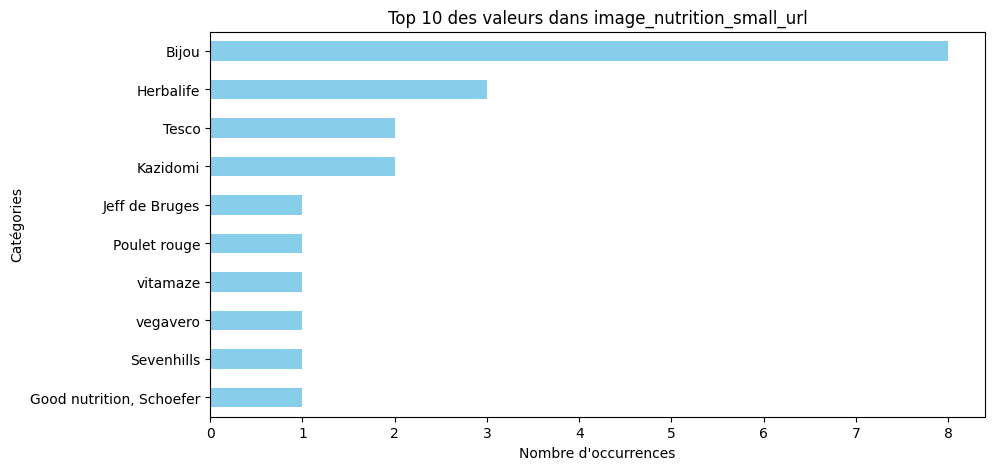

In [15]:
# Compter les occurrences de chaque catégorie
counts = cat_cols["brands"].value_counts().head(10)  # Prendre les 10 catégories les plus fréquentes de la colonne 'brands'

# Tracer le graphique
plt.figure(figsize=(10, 5))
counts.plot(kind='barh', color='skyblue')
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Catégories")
plt.title(f"Top 10 des valeurs dans {col}")
plt.gca().invert_yaxis()  # Inverser l'ordre pour la lisibilité
plt.show()

##### 2.3.3°) Détecter les catégories trop rares(valeurs minoritaires)

In [16]:
## Détecter les valeurs rares (moins de 1% des données)
#threshold = 0.02  # Seuil de rareté : 1%
#for col in cat_cols:
    #rare_values = cat_cols[col].value_counts(normalize=True)[cat_cols[col].value_counts(normalize=True) < threshold]
    #f not rare_values.empty:
        #print(f"\n⚠️ Valeurs rares détectées dans '{col}':")
        #print(rare_values)

##### 2.3.4°) Gérer les déséquilibres détectés

In [17]:
## Si des catégories sont très rares (<1%) 
## Regrouper les valeurs rares dans une atégorie "Autre"
#threshold = 0.01  # Seuil de fréquence
#col = "brands"  # par exemple 'brands'

## Identifier les valeurs rares
#counts = df[col].value_counts(normalize=True)
#rare_values = counts[counts < threshold].index

## Remplacer par "Autre"
#df[col] = df[col].replace(rare_values, "Autre")


### 2.4°) Définir les colonnes ordinales et non ordinales

In [18]:
def separate_ordinal_and_nonordinal(df):
    """
    Sépare les colonnes ordinales et non ordinales dans un DataFrame.
    
    :param df: DataFrame pandas avec des colonnes catégorielles
    :return: Deux DataFrames, l'un avec les colonnes ordinales et l'autre avec les colonnes non ordinales
    """
    # Créer une liste de colonnes ordinales et non ordinales
    ordinal_cols = []
    non_ordinal_cols = []
    
    # Ici, nous présumons que les colonnes ordinales ont un ordre défini dans les valeurs uniques
    # Par exemple, des valeurs comme 'Bas', 'Moyen', 'Haut' sont ordinales, alors que 'Chat', 'Chien', 'Poisson' sont non ordinales.
    
    for col in cat_cols.columns:
        # On vérifie si la colonne est de type 'object' (catégorielle)
        if 'datetime' in col or 'grade' in col:
            ordinal_cols.append(col)         
        else:
            non_ordinal_cols.append(col)
    
    # Extraire les données pour les colonnes ordinales et non ordinales
    ordinal_data = df[ordinal_cols]
    non_ordinal_data = df[non_ordinal_cols]
    
    return ordinal_data, non_ordinal_data

# Exemple d'utilisation
ordinal_data, non_ordinal_data = separate_ordinal_and_nonordinal(cat_cols)

# Afficher les résultats
print("Colonnes ordinales:")
print(ordinal_data.head())

print("\nColonnes non ordinales:")
print(non_ordinal_data.head())


Colonnes ordinales:
       created_datetime last_modified_datetime last_updated_datetime  \
0  2020-02-24T18:30:31Z   2024-12-01T20:33:24Z  2025-02-06T13:42:06Z   
1  2023-01-13T14:31:47Z   2024-11-29T20:48:51Z  2025-02-06T13:41:15Z   
2  2020-01-26T19:21:22Z   2025-01-19T00:51:02Z  2025-02-04T16:50:01Z   
3  2021-10-20T15:57:36Z   2025-02-04T13:42:21Z  2025-02-06T13:22:19Z   
4  2019-10-26T19:22:23Z   2025-01-28T14:12:50Z  2025-02-06T14:04:43Z   

  nutriscore_grade environmental_score_grade   last_image_datetime  
0          unknown                   unknown  2024-12-01T20:33:24Z  
1          unknown                   unknown  2024-11-29T20:48:46Z  
2          unknown                       NaN  2025-01-19T00:51:00Z  
3                e                   unknown  2025-02-04T13:42:00Z  
4          unknown                   unknown  2025-01-28T14:12:37Z  

Colonnes non ordinales:
                                                 url  creator  \
0  http://world-en.openfoodfacts.org/produc

# 3°) Choix de la méthode d'encodage

### 3.1°) Dummies

In [19]:
# Exemple d'encodage avec get_dummies pour une colonne à faible cardinalité
#cat_cols_dummies = pd.get_dummies(cat_cols, columns=['pnns_groups_1'], drop_first=True) #exemple avec la colonne 'nutriscore_grade'
#cat_cols_dummies

cf. [Chapitre 5: Préparation de données](https://filedn.eu/lefeldrXcsSFgCcgc48eaLY/cours/general/site/data%20science/introduction/preparation_donnees/)

### 3.2°) Factorize

In [20]:
# Autres façon de faire de l'encodage de colonnes catégorielles en utilisant la fonction factorize de pandas
#codes, uniques = pd.factorize(df_filtered['labels']) # Exemple avec la colonne 'Labels'
#df_filtered['labels_dummies'] = codes
#df_filtered[['labels_dummies', 'labels']]

### 3.3°) OrdinalEncoder

In [21]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

In [22]:
ordinal_data.head()

,created_datetime,last_modified_datetime,last_updated_datetime,nutriscore_grade,environmental_score_grade,last_image_datetime
0,2020-02-24T18:30:31Z,2024-12-01T20:33:24Z,2025-02-06T13:42:06Z,unknown,unknown,2024-12-01T20:33:24Z
1,2023-01-13T14:31:47Z,2024-11-29T20:48:51Z,2025-02-06T13:41:15Z,unknown,unknown,2024-11-29T20:48:46Z
2,2020-01-26T19:21:22Z,2025-01-19T00:51:02Z,2025-02-04T16:50:01Z,unknown,NaN,2025-01-19T00:51:00Z
3,2021-10-20T15:57:36Z,2025-02-04T13:42:21Z,2025-02-06T13:22:19Z,e,unknown,2025-02-04T13:42:00Z
4,2019-10-26T19:22:23Z,2025-01-28T14:12:50Z,2025-02-06T14:04:43Z,unknown,unknown,2025-01-28T14:12:37Z


In [52]:
oe = preprocessing.OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ordinal_data_transform = oe.fit_transform(ordinal_data)

In [53]:
ordinal_data_transform

array([[47., 47., 58.,  6.,  7., 59.],
       [72., 45., 57.,  6.,  7., 57.],
       [45., 69., 23.,  6., nan, 76.],
       [61., 85., 54.,  4.,  7., 80.],
       [34., 76., 61.,  6.,  7., 79.],
       [91., 99., 72.,  2.,  7., 82.],
       [86., 96., 69.,  3.,  7., 85.],
       [27., 97., 70.,  4.,  7., 86.],
       [85.,  2., 64.,  6., nan, 34.],
       [52., 63., 55.,  4.,  7., 70.],
       [97., 87., 56.,  2.,  7., 71.],
       [83., 89., 15.,  6., nan, 31.],
       [75., 83., 42.,  3.,  7., 77.],
       [53., 64., 47.,  5.,  7., 72.],
       [ 5., 98., 71.,  1.,  7., 87.],
       [74.,  4.,  0.,  6., nan, nan],
       [ 0., 65., 34.,  4.,  5., 73.],
       [87., 60., 21.,  6.,  7., 54.],
       [41., 53., 16.,  5.,  7., 63.],
       [23., 91., 46.,  3., nan, 81.],
       [84., 58., 17.,  5.,  7., 52.],
       [ 4.,  5., 31.,  4.,  3., 19.],
       [82., 12., 35.,  6., nan, 27.],
       [93., 86., 52.,  6.,  7., 78.],
       [95., 54., 60.,  6.,  7., nan],
       [88., 38., 36.,  6

In [54]:
# Convertir ndarray en DataFrame et ajouter des noms de colonnes
ordinal_data_transform_df = pd.DataFrame(ordinal_data_transform, columns=ordinal_data.columns)

ordinal_data_transform_df                      

,created_datetime,last_modified_datetime,last_updated_datetime,nutriscore_grade,environmental_score_grade,last_image_datetime
0,47.0,47.0,58.0,6.0,7.0,59.0
1,72.0,45.0,57.0,6.0,7.0,57.0
2,45.0,69.0,23.0,6.0,NaN,76.0
3,61.0,85.0,54.0,4.0,7.0,80.0
4,34.0,76.0,61.0,6.0,7.0,79.0
...,...,...,...,...,...,...
95,10.0,37.0,50.0,6.0,NaN,46.0
96,63.0,34.0,63.0,NaN,NaN,NaN
97,11.0,30.0,44.0,3.0,4.0,40.0
98,36.0,23.0,9.0,6.0,7.0,9.0


### 3.4°) One-Hot Encodage (OHE)

In [25]:
# On définit et on entraîne un OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(handle_unknown='ignore')
#enc.fit(cat_cols.loc[:, ['pnns_groups_1', 'environmental_score_grade']]) 
#Possibilité d'ajouter toutes les  colonnes non ordinales avec la varibale non_ordinal_data

In [26]:
# On peut regarder les catégories uniques qui vont être encodées
#enc.categories_

In [27]:
# On applique ensuite la transformation
#encoded_features = enc.transform(cat_cols.loc[:, ['pnns_groups_1', 'environmental_score_grade']]).toarray()
#encoded_features

In [28]:
# Scikit-learn permet aussi de récupérer le nom des features encodées
#encoded_features_names = enc.get_feature_names_out()
#encoded_features_names

In [29]:
# Ou de l'afficher dans un DataFrame
#pd.DataFrame(encoded_features,
            #columns = encoded_features_names).head()

### 3.5°) Label Encoder 

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
#cat_cols['nutriscore_grade'].nunique(dropna=False)

In [32]:
#print("Unique values before encoding:")
#print(cat_cols['nutriscore_grade'].unique())

In [33]:
#cat_cols['nutriscore_grade'].head(5)

In [34]:
# Exemple d'encodage avec Label Encoder sur la colonne 'nutriscore_grade'
#label_enc = LabelEncoder()
#cat_cols_nutriscore = label_enc.fit_transform(cat_cols['nutriscore_grade']) 

In [35]:
# Convertir l'array cat_cols_nutriscore en une Series pandas
#cat_cols_nutriscore_series = pd.Series(cat_cols_nutriscore)
#cat_cols_nutriscore_series.value_counts()

### 3.6°) Count Encoder

cf. [Scikit-Learn : Count Encoder](https://contrib.scikit-learn.org/category_encoders/count.html)

In [36]:
non_ordinal_data.head()

,url,creator,last_modified_by,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_en,...,nutrient_levels_tags,popularity_tags,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
0,http://world-en.openfoodfacts.org/product/0000...,kiliweb,NaN,Limonade artisanale a la rose,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN
1,http://world-en.openfoodfacts.org/product/0000...,kiliweb,insectproductadd,Tablette Tanzanie,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"top-75-percent-scans-2024,top-80-percent-scans...",NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN
2,http://world-en.openfoodfacts.org/product/0000...,kiliweb,smoothie-app,Chocolate n 3,80 g,Jeff de Bruges,jeff-de-bruges,NaN,NaN,NaN,...,NaN,"bottom-25-percent-scans-2022,bottom-20-percent...",NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...
3,http://world-en.openfoodfacts.org/product/0000...,inf,waistline-app,KOJI MISO PASTE,300g,UMAMI,umami,"Supplements, Vegtable","en:supplements,en:vegtable","Supplements,Vegtable",...,"en:fat-in-moderate-quantity,en:saturated-fat-i...","top-75-percent-scans-2024,top-80-percent-scans...",en:vegtable,Vegtable,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...
4,http://world-en.openfoodfacts.org/product/0000...,kiliweb,NaN,Paleta gran reserva - Sierra nevada-,750ml,AdvoCare,advocare,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",...,NaN,"top-75-percent-scans-2024,top-80-percent-scans...",en:beverages,Beverages,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...


In [37]:
#!pip install category_encoders

In [38]:
import category_encoders as ce

In [43]:
# Initialisation de CountEncoder
encoder = ce.CountEncoder(cols=non_ordinal_data, handle_unknown='value', handle_missing='value')

# Encodage des données
df_encoded = encoder.fit_transform(non_ordinal_data)

df_encoded.head()

,url,creator,last_modified_by,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_en,...,nutrient_levels_tags,popularity_tags,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
0,1,12,12,1,38,19,19,36,36,36,...,62,20,36,36,1,1,58,58,55,55
1,1,12,2,1,38,19,19,36,36,36,...,62,2,36,36,1,1,58,58,55,55
2,1,12,9,1,1,1,1,36,36,36,...,62,1,36,36,1,1,58,58,1,1
3,1,1,4,1,1,1,1,1,1,1,...,1,2,1,1,1,1,1,1,1,1
4,1,12,12,1,1,1,1,2,2,2,...,62,1,2,2,1,1,58,58,1,1


In [40]:
# Exemple d'encodage sur une seule colonne de votre choix par exemple avec la colonne main_category
#freq_encoding = df['main_category'].value_counts(normalize=True)
#df['main_category'] = df['main_category'].map(freq_encoding)
#df['main_category']

### 3.6°) Hashing Encoder (A RETRAVAILLER)

cf. [Scikit-Learn : HashingEncoder](https://contrib.scikit-learn.org/category_encoders/hashing.html)

In [41]:
non_ordinal_data.columns

Index(['url', 'creator', 'last_modified_by', 'product_name', 'quantity',
       'brands', 'brands_tags', 'categories', 'categories_tags',
       'categories_en', 'labels', 'labels_tags', 'labels_en', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text',
       'ingredients_tags', 'ingredients_analysis_tags', 'serving_size',
       'pnns_groups_1', 'pnns_groups_2', 'food_groups', 'food_groups_tags',
       'food_groups_en', 'states', 'states_tags', 'states_en',
       'nutrient_levels_tags', 'popularity_tags', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url'],
      dtype='object')

In [55]:
# Initialiser le HashingEncoder
#encoder = ce.HashingEncoder(cols=non_ordinal_data.columns, n_components=4, hash_method='md5', return_df=True)

# Appliquer le HashingEncoder
#df_encoded = encoder.fit_transform(df)

# Afficher le DataFrame encodé
#df_encoded

# 4°) Obtention du dataframe encodé

In [58]:
# Concatenation des DataFrames sur les colonnes (axis=1)
df_combined = pd.concat([df_encoded, ordinal_data_transform_df], axis=1)

# Affichage du DataFrame combiné
df_combined.head()

,url,creator,last_modified_by,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_en,...,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,created_datetime,last_modified_datetime,last_updated_datetime,nutriscore_grade,environmental_score_grade,last_image_datetime
0,1,12,12,1,38,19,19,36,36,36,...,58,58,55,55,47.0,47.0,58.0,6.0,7.0,59.0
1,1,12,2,1,38,19,19,36,36,36,...,58,58,55,55,72.0,45.0,57.0,6.0,7.0,57.0
2,1,12,9,1,1,1,1,36,36,36,...,58,58,1,1,45.0,69.0,23.0,6.0,NaN,76.0
3,1,1,4,1,1,1,1,1,1,1,...,1,1,1,1,61.0,85.0,54.0,4.0,7.0,80.0
4,1,12,12,1,1,1,1,2,2,2,...,58,58,1,1,34.0,76.0,61.0,6.0,7.0,79.0


In [59]:
df_combined.to_csv("df_combined.csv", index=True)